# Операции группировки данных (Groupby) и многоуровневый индекс (мульти-индекс)
Операции groupby() позволяют изучать данные отдельно по категориям.

Для groupby() необходимо выбрать категориальную колонку. Категориальные колонки принимают дискретные (не непрерывные) значения.
Категориальные колонки не обязаны быть текстовыми. Они могут быть числовыми, например класс вагона в поезде или каюты на корабле - 1-й класс, 2-й класс, 3-й класс.

После того, как выбрана колонка для группировки данных, вызывается метод groupby() для агрегации данных. Pandas берёт данные, берёт колонку по которой необходимо сгруппировать данные и объединяет между собой строки с одинаковым значением группирующей колонки. Далее выбирается функция агрегации, с помощью которой данные будут агрегироваться - например sum().  
В итоге groupby() возвращает столько строк, сколько различных значений встретилось в колонке группировки.
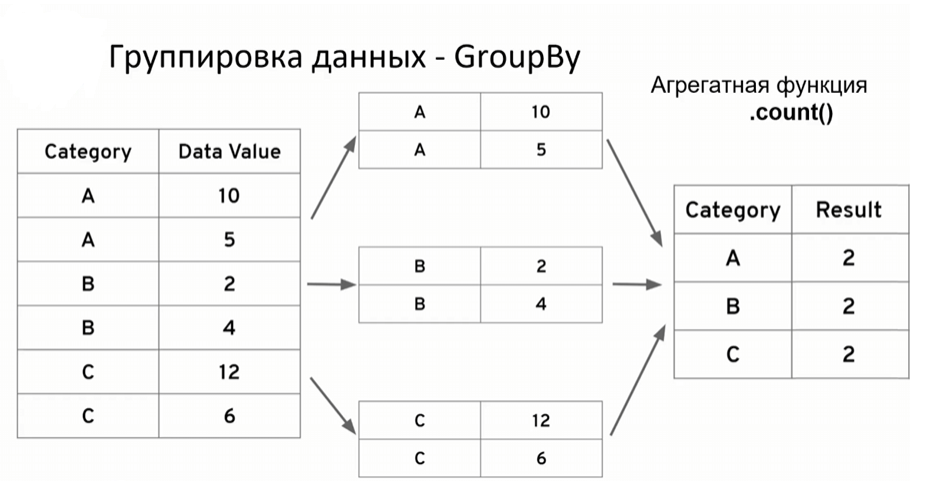

*__Операция groupby() создает "ленивый" объект groupby, который не выполняет всю работу сразу, а ждёт того момента, когда к нему будет вызван метод для получения этх данных.__*

In [9]:
import numpy as np
import pandas as pd

In [11]:
df = pd.read_csv('mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [13]:
# Проверка различных значений в столбце
df['model_year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

In [15]:
# Второй способ просмотра значений в колнке
df['model_year'].value_counts()

model_year
73    40
78    36
76    34
82    31
75    30
70    29
79    29
80    29
81    29
71    28
72    28
77    28
74    27
Name: count, dtype: int64

## Метод groupby()

In [17]:
df.groupby('model_year') # Получим объект groupby()

### Добавляем вызов метода агрегации. Чтобы использовать объект groupby, нам нужно сообщить Pandas, как мы зотим агрегировать данные.

Наиболее частые варианты:

* mean() - среднее значение
* sum() - сумма значений
* size() - размер группы
* count() - количество элементов
* std() - среднеквадратическое отклонение (standard deviation)
* var() - дисперсия (variance)
* sem() - стандартная ошибка среднего (standard error of the mean)
* describe() - суммарные статистики
* first() - первое значение
* last() - последнее значение
* nth() - n-ое значение, или набор значений если n является списком
* min() - минимальное значение
* max() - масимальное значение

Полный список функций можно посмотреть в документации: https://pandas.pydata.org/docs/reference/groupby.html

In [21]:
# Обратимся к объекту groupby() с помощью агрегирующей функции

#df.groupby('model_year').maen() -> Работает только в старых версиях Pandas

# Колонка model_year становится индексом! Теперь это НЕ название колонки, а название индекса

df.groupby('model_year').mean(numeric_only=True)

,mpg,cylinders,displacement,weight,acceleration,origin
model_year,,,,,,
70,17.689655,6.758621,281.413793,3372.793103,12.948276,1.310345
71,21.250000,5.571429,209.750000,2995.428571,15.142857,1.428571
72,18.714286,5.821429,218.375000,3237.714286,15.125000,1.535714
73,17.100000,6.375000,256.875000,3419.025000,14.312500,1.375000
74,22.703704,5.259259,171.740741,2877.925926,16.203704,1.666667
75,20.266667,5.600000,205.533333,3176.800000,16.050000,1.466667
76,21.573529,5.647059,197.794118,3078.735294,15.941176,1.470588
77,23.375000,5.464286,191.392857,2997.357143,15.435714,1.571429
78,24.061111,5.361111,177.805556,2861.805556,15.805556,1.611111


*Мы получили датафрейм с именнованным индексом*

In [26]:
# Как получить одну колонку, а не весь датафрейм
df.groupby('model_year').mean(numeric_only=True)['mpg']

model_year
70    17.689655
71    21.250000
72    18.714286
73    17.100000
74    22.703704
75    20.266667
76    21.573529
77    23.375000
78    24.061111
79    25.093103
80    33.696552
81    30.334483
82    31.709677
Name: mpg, dtype: float64

In [32]:
avg_year = df.groupby('model_year').mean(numeric_only=True)

In [36]:
avg_year.index

Index([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype='int64', name='model_year')

In [38]:
avg_year.columns

Index(['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'origin'], dtype='object')

In [40]:
avg_year['mpg']

model_year
70    17.689655
71    21.250000
72    18.714286
73    17.100000
74    22.703704
75    20.266667
76    21.573529
77    23.375000
78    24.061111
79    25.093103
80    33.696552
81    30.334483
82    31.709677
Name: mpg, dtype: float64

In [28]:
df.groupby('model_year').describe()

mpg                                                          \
           count       mean       std   min     25%    50%     75%   max   
model_year                                                                 
70          29.0  17.689655  5.339231   9.0  14.000  16.00  22.000  27.0   
71          28.0  21.250000  6.591942  12.0  15.500  19.00  27.000  35.0   
72          28.0  18.714286  5.435529  11.0  13.750  18.50  23.000  28.0   
73          40.0  17.100000  4.700245  11.0  13.000  16.00  20.000  29.0   
74          27.0  22.703704  6.420010  13.0  16.000  24.00  27.000  32.0   
75          30.0  20.266667  4.940566  13.0  16.000  19.50  23.000  33.0   
76          34.0  21.573529  5.889297  13.0  16.750  21.00  26.375  33.0   
77          28.0  23.375000  6.675862  15.0  17.375  21.75  30.000  36.0   
78          36.0  24.061111  6.898044  16.2  19.350  20.70  28.000  43.1   
79          29.0  25.093103  6.794217  15.5  19.200  23.90  31.800  37.3   
80          29.0  33.696552  7.037983  19.1  29.800  32.70  38.100  46.6   
81          29.0  30.334483  5.591465  17.6  26.600  31.60  34.400  39.1   
82          31.0  31.709677  5.392548  22.0  27.000  32.00  36.000  44.0   

           cylinders            ... acceleration       origin            \
               count      mean  ...          75%   max  count      mean   
model_year                      ...                                       
70              29.0  6.758621  ...       15.000  20.5   29.0  1.310345   
71              28.0  5.571429  ...       16.125  20.5   28.0  1.428571   
72              28.0  5.821429  ...       16.625  23.5   28.0  1.535714   
73              40.0  6.375000  ...       16.000  21.0   40.0  1.375000   
74              27.0  5.259259  ...       17.000  21.0   27.0  1.666667   
75              30.0  5.600000  ...       17.375  21.0   30.0  1.466667   
76              34.0  5.647059  ...       17.550  22.2   34.0  1.470588   
77              28.0  5.464286  ...       16.925  19.0   28.0  1.571429   
78              36.0  5.361111  ...       16.825  21.5   36.0  1.611111   
79              29.0  5.827586  ...       17.300  24.8   29.0  1.275862   
80              29.0  4.137931  ...       18.700  23.7   29.0  2.206897   
81              29.0  4.620690  ...       17.300  20.7   29.0  1.965517   
82              31.0  4.193548  ...       18.000  24.6   31.0  1.645161   

                                               
                 std  min  25%  50%  75%  max  
model_year                                     
70          0.603765  1.0  1.0  1.0  1.0  3.0  
71          0.741798  1.0  1.0  1.0  2.0  3.0  
72          0.792658  1.0  1.0  1.0  2.0  3.0  
73          0.667467  1.0  1.0  1.0  2.0  3.0  
74          0.832050  1.0  1.0  1.0  2.0  3.0  
75          0.730297  1.0  1.0  1.0  2.0  3.0  
76          0.706476  1.0  1.0  1.0  2.0  3.0  
77          0.835711  1.0  1.0  1.0  2.0  3.0  
78          0.837608  1.0  1.0  1.0  2.0  3.0  
79          0.591400  1.0  1.0  1.0  1.0  3.0  
80          0.818505  1.0  2.0  2.0  3.0  3.0  
81          0.944259  1.0  1.0  2.0  3.0  3.0  
82          0.914636  1.0  1.0  1.0  3.0  3.0  

[13 rows x 48 columns]

In [30]:
df.groupby('model_year').describe().transpose()

model_year                   70           71           72           73  \
mpg          count    29.000000    28.000000    28.000000    40.000000   
             mean     17.689655    21.250000    18.714286    17.100000   
             std       5.339231     6.591942     5.435529     4.700245   
             min       9.000000    12.000000    11.000000    11.000000   
             25%      14.000000    15.500000    13.750000    13.000000   
             50%      16.000000    19.000000    18.500000    16.000000   
             75%      22.000000    27.000000    23.000000    20.000000   
             max      27.000000    35.000000    28.000000    29.000000   
cylinders    count    29.000000    28.000000    28.000000    40.000000   
             mean      6.758621     5.571429     5.821429     6.375000   
             std       1.724926     1.665079     2.073708     1.807215   
             min       4.000000     4.000000     3.000000     3.000000   
             25%       6.000000     4.000000     4.000000     4.000000   
             50%       8.000000     6.000000     4.000000     7.000000   
             75%       8.000000     6.500000     8.000000     8.000000   
             max       8.000000     8.000000     8.000000     8.000000   
displacement count    29.000000    28.000000    28.000000    40.000000   
             mean    281.413793   209.750000   218.375000   256.875000   
             std     124.421380   115.102410   123.781964   121.722085   
             min      97.000000    71.000000    70.000000    68.000000   
             25%     198.000000    97.750000   109.250000   121.750000   
             50%     307.000000   228.500000   131.000000   276.000000   
             75%     383.000000   273.000000   326.000000   350.250000   
             max     455.000000   400.000000   429.000000   455.000000   
weight       count    29.000000    28.000000    28.000000    40.000000   
             mean   3372.793103  2995.428571  3237.714286  3419.025000   
             std     852.868663  1061.830859   974.520960   974.809133   
             min    1835.000000  1613.000000  2100.000000  1867.000000   
             25%    2648.000000  2110.750000  2285.500000  2554.500000   
             50%    3449.000000  2798.000000  2956.000000  3338.500000   
             75%    4312.000000  3603.250000  4169.750000  4247.250000   
             max    4732.000000  5140.000000  4633.000000  4997.000000   
acceleration count    29.000000    28.000000    28.000000    40.000000   
             mean     12.948276    15.142857    15.125000    14.312500   
             std       3.330982     2.666171     2.850032     2.754222   
             min       8.000000    11.500000    11.000000     9.500000   
             25%      10.000000    13.375000    13.375000    12.500000   
             50%      12.500000    14.500000    14.500000    14.000000   
             75%      15.000000    16.125000    16.625000    16.000000   
             max      20.500000    20.500000    23.500000    21.000000   
origin       count    29.000000    28.000000    28.000000    40.000000   
             mean      1.310345     1.428571     1.535714     1.375000   
             std       0.603765     0.741798     0.792658     0.667467   
             min       1.000000     1.000000     1.000000     1.000000   
             25%       1.000000     1.000000     1.000000     1.000000   
             50%       1.000000     1.000000     1.000000     1.000000   
             75%       1.000000     2.000000     2.000000     2.000000   
             max       3.000000     3.000000     3.000000     3.000000   

model_year                   74           75           76           77  \
mpg          count    27.000000    30.000000    34.000000    28.000000   
             mean     22.703704    20.266667    21.573529    23.375000   
             std       6.420010     4.940566     5.889297     6.675862   
             min      13.000000    13.000000    13.000000    15.000000   
   

## Метод groupby() по нескольким колонкам

Можно изучить средние значения по годам и по количеству цилиндров

In [46]:
# Передадим в groupby [список колонок]

df.groupby(['model_year', 'cylinders']).mean(numeric_only=True)

mpg  displacement       weight  acceleration  \
model_year cylinders                                                       
70         4          25.285714    107.000000  2292.571429     16.000000   
           6          20.500000    199.000000  2710.500000     15.500000   
           8          14.111111    367.555556  3940.055556     11.194444   
71         4          27.461538    101.846154  2056.384615     16.961538   
           6          18.000000    243.375000  3171.875000     14.750000   
           8          13.428571    371.714286  4537.714286     12.214286   
72         3          19.000000     70.000000  2330.000000     13.500000   
           4          23.428571    111.535714  2382.642857     17.214286   
           8          13.615385    344.846154  4228.384615     13.000000   
73         3          18.000000     70.000000  2124.000000     13.500000   
           4          22.727273    109.272727  2338.090909     17.136364   
           6          19.000000    212.250000  2917.125000     15.687500   
           8          13.200000    365.250000  4279.050000     12.250000   
74         4          27.800000     96.533333  2151.466667     16.400000   
           6          17.857143    230.428571  3320.000000     16.857143   
           8          14.200000    315.200000  4438.400000     14.700000   
75         4          25.250000    114.833333  2489.250000     15.833333   
           6          17.583333    233.750000  3398.333333     17.708333   
           8          15.666667    330.500000  4108.833333     13.166667   
76         4          26.766667    106.333333  2306.600000     16.866667   
           6          20.000000    221.400000  3349.600000     17.000000   
           8          14.666667    324.000000  4064.666667     13.222222   
77         3          21.500000     80.000000  2720.000000     13.500000   
           4          29.107143    106.500000  2205.071429     16.064286   
           6          19.500000    220.400000  3383.000000     16.900000   
           8          16.000000    335.750000  4177.500000     13.662500   
78         4          29.576471    112.117647  2296.764706     16.282353   
           5          20.300000    131.000000  2830.000000     15.900000   
           6          19.066667    213.250000  3314.166667     16.391667   
           8          19.050000    300.833333  3563.333333     13.266667   
79         4          31.525000    113.583333  2357.583333     15.991667   
           5          25.400000    183.000000  3530.000000     20.100000   
           6          22.950000    205.666667  3025.833333     15.433333   
           8          18.630000    321.400000  3862.900000     15.400000   
80         3          23.700000     70.000000  2420.000000     12.500000   
           4          34.612000    111.000000  2360.080000     17.144000   
           5          36.400000    121.000000  2950.000000     19.900000   
           6          25.900000    196.500000  3145.500000     15.050000   
81         4          32.814286    108.857143  2275.476190     16.466667   
           6          23.428571    184.000000  3093.571429     15.442857   
           8          26.600000    350.000000  3725.000000     19.000000   
82         4          32.071429    118.571429  2402.321429     16.703571   
           6          28.333333    225.000000  2931.666667     16.033333   

                        origin  
model_year cylinders            
70         4          2.285714  
           6          1.000000  
           8          1.000000  
71         4          1.923077  
           6          1.000000  
           8          1.000000  
72         3          3.000000  
           4          1.928571  
           8          1.000000  
73         3          3.000000  
           4          2.000000  
           6          1.250000  
           8          1.000000  
74         4          2.200000  
           6          1.000000  
           8          1.000000  
75         4 

*Здесь мы получаем иерархический индекс (мульти-индекс). Сначала данные группируются по годам, а внутри их по количеству цилиндров.*

In [49]:
# Кортежи со всеми возможными значениями индекса
df.groupby(['model_year', 'cylinders']).mean(numeric_only=True).index

MultiIndex([(70, 4),
            (70, 6),
            (70, 8),
            (71, 4),
            (71, 6),
            (71, 8),
            (72, 3),
            (72, 4),
            (72, 8),
            (73, 3),
            (73, 4),
            (73, 6),
            (73, 8),
            (74, 4),
            (74, 6),
            (74, 8),
            (75, 4),
            (75, 6),
            (75, 8),
            (76, 4),
            (76, 6),
            (76, 8),
            (77, 3),
            (77, 4),
            (77, 6),
            (77, 8),
            (78, 4),
            (78, 5),
            (78, 6),
            (78, 8),
            (79, 4),
            (79, 5),
            (79, 6),
            (79, 8),
            (80, 3),
            (80, 4),
            (80, 5),
            (80, 6),
            (81, 4),
            (81, 6),
            (81, 8),
            (82, 4),
            (82, 6)],
           names=['model_year', 'cylinders'])

In [51]:
df.groupby(['model_year', 'cylinders']).mean(numeric_only=True).columns

Index(['mpg', 'displacement', 'weight', 'acceleration', 'origin'], dtype='object')

## Мульти-индекс (MultiIndex)

### Объект MultiIndex

In [59]:
year_cyl = df.groupby(['model_year', 'cylinders']).mean(numeric_only=True)
year_cyl.head()

mpg  displacement       weight  acceleration  \
model_year cylinders                                                       
70         4          25.285714    107.000000  2292.571429     16.000000   
           6          20.500000    199.000000  2710.500000     15.500000   
           8          14.111111    367.555556  3940.055556     11.194444   
71         4          27.461538    101.846154  2056.384615     16.961538   
           6          18.000000    243.375000  3171.875000     14.750000   

                        origin  
model_year cylinders            
70         4          2.285714  
           6          1.000000  
           8          1.000000  
71         4          1.923077  
           6          1.000000

In [61]:
# Чтобы узнать как называются отдельные составляющие индекса
year_cyl.index.names

FrozenList(['model_year', 'cylinders'])

In [63]:
# Как получить различные уровни мульти-индекса
# Получим список состоящий из списоков
year_cyl.index.levels

FrozenList([[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], [3, 4, 5, 6, 8]])

*__Эти списки не означают, что все из этих комбинаций могут встретиться в датафрейме!!!__*

## Индексирование с помощью иерархического индекса
Документация: https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html

In [68]:
# Индексирование по внешнему индексу
year_cyl.loc[70]

,mpg,displacement,weight,acceleration,origin
cylinders,,,,,
4,25.285714,107.000000,2292.571429,16.000000,2.285714
6,20.500000,199.000000,2710.500000,15.500000,1.000000
8,14.111111,367.555556,3940.055556,11.194444,1.000000


*Внешний индекс изчез, остался только внутренний*

In [71]:
# Индесирование по списку
year_cyl.loc[[70, 82]]

mpg  displacement       weight  acceleration  \
model_year cylinders                                                       
70         4          25.285714    107.000000  2292.571429     16.000000   
           6          20.500000    199.000000  2710.500000     15.500000   
           8          14.111111    367.555556  3940.055556     11.194444   
82         4          32.071429    118.571429  2402.321429     16.703571   
           6          28.333333    225.000000  2931.666667     16.033333   

                        origin  
model_year cylinders            
70         4          2.285714  
           6          1.000000  
           8          1.000000  
82         4          1.714286  
           6          1.000000

*Оба индекса на месте, чтобы отделить года друг от друга*

__Чтобы получить одну строку (конкретный год, конкретное количество цилиндров) - необходимо передать кортеж__

In [76]:
year_cyl.loc[(70, 4)]

mpg               25.285714
displacement     107.000000
weight          2292.571429
acceleration      16.000000
origin             2.285714
Name: (70, 4), dtype: float64

*В таком случае мы получим объект Series*

Метод .loc() не работает для внутреннего индекса, для этого существует метод .xs()

## Получение данных на основе пересечения (cross-section) с помощью метода .xs()
Этот метод использует параметр `key` для выборки данных на некотором уровен мульти-индекса.

__Параметы__:
--------
    key - метка (label) или кортеж из меток  
        Метка должна содержаться в индексе, или частично в мульти-индексе.
    axis - {0 или 'index', 1 или 'columns'}, по умолчанию 0  
        Ось, по которой делаем пересечение.
    level - объект, по умолчанию первые n уровней (n=1 или len(key))  
        В случае, если ключ частично содержится в мульти-индексе, то этот параметр указывает на те
    уровни, которые следует использовать. Уровни можно указывать с помощью меток или позиции.


In [85]:
# Выберем все строки для 'model_year'=70
year_cyl.xs(key=70, level='model_year')

,mpg,displacement,weight,acceleration,origin
cylinders,,,,,
4,25.285714,107.000000,2292.571429,16.000000,2.285714
6,20.500000,199.000000,2710.500000,15.500000,1.000000
8,14.111111,367.555556,3940.055556,11.194444,1.000000


*__Метод xs() - принимает на вход только одно значение ключа, ему нельзя передать список__*

С помощью метода .xs() можно работать со внутренними индексами

In [90]:
year_cyl

mpg  displacement       weight  acceleration  \
model_year cylinders                                                       
70         4          25.285714    107.000000  2292.571429     16.000000   
           6          20.500000    199.000000  2710.500000     15.500000   
           8          14.111111    367.555556  3940.055556     11.194444   
71         4          27.461538    101.846154  2056.384615     16.961538   
           6          18.000000    243.375000  3171.875000     14.750000   
           8          13.428571    371.714286  4537.714286     12.214286   
72         3          19.000000     70.000000  2330.000000     13.500000   
           4          23.428571    111.535714  2382.642857     17.214286   
           8          13.615385    344.846154  4228.384615     13.000000   
73         3          18.000000     70.000000  2124.000000     13.500000   
           4          22.727273    109.272727  2338.090909     17.136364   
           6          19.000000    212.250000  2917.125000     15.687500   
           8          13.200000    365.250000  4279.050000     12.250000   
74         4          27.800000     96.533333  2151.466667     16.400000   
           6          17.857143    230.428571  3320.000000     16.857143   
           8          14.200000    315.200000  4438.400000     14.700000   
75         4          25.250000    114.833333  2489.250000     15.833333   
           6          17.583333    233.750000  3398.333333     17.708333   
           8          15.666667    330.500000  4108.833333     13.166667   
76         4          26.766667    106.333333  2306.600000     16.866667   
           6          20.000000    221.400000  3349.600000     17.000000   
           8          14.666667    324.000000  4064.666667     13.222222   
77         3          21.500000     80.000000  2720.000000     13.500000   
           4          29.107143    106.500000  2205.071429     16.064286   
           6          19.500000    220.400000  3383.000000     16.900000   
           8          16.000000    335.750000  4177.500000     13.662500   
78         4          29.576471    112.117647  2296.764706     16.282353   
           5          20.300000    131.000000  2830.000000     15.900000   
           6          19.066667    213.250000  3314.166667     16.391667   
           8          19.050000    300.833333  3563.333333     13.266667   
79         4          31.525000    113.583333  2357.583333     15.991667   
           5          25.400000    183.000000  3530.000000     20.100000   
           6          22.950000    205.666667  3025.833333     15.433333   
           8          18.630000    321.400000  3862.900000     15.400000   
80         3          23.700000     70.000000  2420.000000     12.500000   
           4          34.612000    111.000000  2360.080000     17.144000   
           5          36.400000    121.000000  2950.000000     19.900000   
           6          25.900000    196.500000  3145.500000     15.050000   
81         4          32.814286    108.857143  2275.476190     16.466667   
           6          23.428571    184.000000  3093.571429     15.442857   
           8          26.600000    350.000000  3725.000000     19.000000   
82         4          32.071429    118.571429  2402.321429     16.703571   
           6          28.333333    225.000000  2931.666667     16.033333   

                        origin  
model_year cylinders            
70         4          2.285714  
           6          1.000000  
           8          1.000000  
71         4          1.923077  
           6          1.000000  
           8          1.000000  
72         3          3.000000  
           4          1.928571  
           8          1.000000  
73         3          3.000000  
           4          2.000000  
           6          1.250000  
           8          1.000000  
74         4          2.200000  
           6          1.000000  
           8          1.000000  
75         4 

In [92]:
year_cyl.xs(key=4, level='cylinders')

,mpg,displacement,weight,acceleration,origin
model_year,,,,,
70,25.285714,107.000000,2292.571429,16.000000,2.285714
71,27.461538,101.846154,2056.384615,16.961538,1.923077
72,23.428571,111.535714,2382.642857,17.214286,1.928571
73,22.727273,109.272727,2338.090909,17.136364,2.000000
74,27.800000,96.533333,2151.466667,16.400000,2.200000
75,25.250000,114.833333,2489.250000,15.833333,2.166667
76,26.766667,106.333333,2306.600000,16.866667,1.866667
77,29.107143,106.500000,2205.071429,16.064286,1.857143
78,29.576471,112.117647,2296.764706,16.282353,2.117647


*__Важно: на выходе метод .xs() не показывает тот уровень мультииндекса, по которому выполнялась фильтрация данных! Так можно заметить что выбирались 4 цилиндра, а в резльтирующем датафрейме уровень 'cylinders' отсутствует. Так как для всех выбранных строк значение 'cylinders'=4, считается, что нет смысла отдельно указывать его для всех строк.__*

### Обратите внимание!
Гораздо проще отфильтровать данные __перед__ вызовом функции groupby(), чем после. Например, намного проще удалить строки со значениями cylinder=4 перед вызовом groupby(), а после это сделать уже сложнее.

In [99]:
# Как получить не одно значение, а несколько
df[df['cylinders'].isin([6, 8])].groupby(['model_year', 'cylinders']).mean(numeric_only=True)

mpg  displacement       weight  acceleration  \
model_year cylinders                                                       
70         6          20.500000    199.000000  2710.500000     15.500000   
           8          14.111111    367.555556  3940.055556     11.194444   
71         6          18.000000    243.375000  3171.875000     14.750000   
           8          13.428571    371.714286  4537.714286     12.214286   
72         8          13.615385    344.846154  4228.384615     13.000000   
73         6          19.000000    212.250000  2917.125000     15.687500   
           8          13.200000    365.250000  4279.050000     12.250000   
74         6          17.857143    230.428571  3320.000000     16.857143   
           8          14.200000    315.200000  4438.400000     14.700000   
75         6          17.583333    233.750000  3398.333333     17.708333   
           8          15.666667    330.500000  4108.833333     13.166667   
76         6          20.000000    221.400000  3349.600000     17.000000   
           8          14.666667    324.000000  4064.666667     13.222222   
77         6          19.500000    220.400000  3383.000000     16.900000   
           8          16.000000    335.750000  4177.500000     13.662500   
78         6          19.066667    213.250000  3314.166667     16.391667   
           8          19.050000    300.833333  3563.333333     13.266667   
79         6          22.950000    205.666667  3025.833333     15.433333   
           8          18.630000    321.400000  3862.900000     15.400000   
80         6          25.900000    196.500000  3145.500000     15.050000   
81         6          23.428571    184.000000  3093.571429     15.442857   
           8          26.600000    350.000000  3725.000000     19.000000   
82         6          28.333333    225.000000  2931.666667     16.033333   

                        origin  
model_year cylinders            
70         6          1.000000  
           8          1.000000  
71         6          1.000000  
           8          1.000000  
72         8          1.000000  
73         6          1.250000  
           8          1.000000  
74         6          1.000000  
           8          1.000000  
75         6          1.000000  
           8          1.000000  
76         6          1.300000  
           8          1.000000  
77         6          1.400000  
           8          1.000000  
78         6          1.166667  
           8          1.000000  
79         6          1.000000  
           8          1.000000  
80         6          2.000000  
81         6          1.714286  
           8          1.000000  
82         6          1.000000

## Как поменять уровни мульти-индекса местами
* Как поменять уровни местами: https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#swapping-levels-with-swaplevel
* Общий метод по изменению порядка уровней:  https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#reordering-levels-with-reorder-levels

In [102]:
year_cyl.head()

mpg  displacement       weight  acceleration  \
model_year cylinders                                                       
70         4          25.285714    107.000000  2292.571429     16.000000   
           6          20.500000    199.000000  2710.500000     15.500000   
           8          14.111111    367.555556  3940.055556     11.194444   
71         4          27.461538    101.846154  2056.384615     16.961538   
           6          18.000000    243.375000  3171.875000     14.750000   

                        origin  
model_year cylinders            
70         4          2.285714  
           6          1.000000  
           8          1.000000  
71         4          1.923077  
           6          1.000000

In [104]:
year_cyl.swaplevel().head()

,,mpg,displacement,weight,acceleration,origin
cylinders,model_year,,,,,
4,70,25.285714,107.000000,2292.571429,16.000000,2.285714
6,70,20.500000,199.000000,2710.500000,15.500000,1.000000
8,70,14.111111,367.555556,3940.055556,11.194444,1.000000
4,71,27.461538,101.846154,2056.384615,16.961538,1.923077
6,71,18.000000,243.375000,3171.875000,14.750000,1.000000


## Сортировка мульти-индекса
* https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#sorting-a-multiindex

In [107]:
# Как сделать сортировку по убыванию
year_cyl.sort_index(level='model_year', ascending=False)

mpg  displacement       weight  acceleration  \
model_year cylinders                                                       
82         6          28.333333    225.000000  2931.666667     16.033333   
           4          32.071429    118.571429  2402.321429     16.703571   
81         8          26.600000    350.000000  3725.000000     19.000000   
           6          23.428571    184.000000  3093.571429     15.442857   
           4          32.814286    108.857143  2275.476190     16.466667   
80         6          25.900000    196.500000  3145.500000     15.050000   
           5          36.400000    121.000000  2950.000000     19.900000   
           4          34.612000    111.000000  2360.080000     17.144000   
           3          23.700000     70.000000  2420.000000     12.500000   
79         8          18.630000    321.400000  3862.900000     15.400000   
           6          22.950000    205.666667  3025.833333     15.433333   
           5          25.400000    183.000000  3530.000000     20.100000   
           4          31.525000    113.583333  2357.583333     15.991667   
78         8          19.050000    300.833333  3563.333333     13.266667   
           6          19.066667    213.250000  3314.166667     16.391667   
           5          20.300000    131.000000  2830.000000     15.900000   
           4          29.576471    112.117647  2296.764706     16.282353   
77         8          16.000000    335.750000  4177.500000     13.662500   
           6          19.500000    220.400000  3383.000000     16.900000   
           4          29.107143    106.500000  2205.071429     16.064286   
           3          21.500000     80.000000  2720.000000     13.500000   
76         8          14.666667    324.000000  4064.666667     13.222222   
           6          20.000000    221.400000  3349.600000     17.000000   
           4          26.766667    106.333333  2306.600000     16.866667   
75         8          15.666667    330.500000  4108.833333     13.166667   
           6          17.583333    233.750000  3398.333333     17.708333   
           4          25.250000    114.833333  2489.250000     15.833333   
74         8          14.200000    315.200000  4438.400000     14.700000   
           6          17.857143    230.428571  3320.000000     16.857143   
           4          27.800000     96.533333  2151.466667     16.400000   
73         8          13.200000    365.250000  4279.050000     12.250000   
           6          19.000000    212.250000  2917.125000     15.687500   
           4          22.727273    109.272727  2338.090909     17.136364   
           3          18.000000     70.000000  2124.000000     13.500000   
72         8          13.615385    344.846154  4228.384615     13.000000   
           4          23.428571    111.535714  2382.642857     17.214286   
           3          19.000000     70.000000  2330.000000     13.500000   
71         8          13.428571    371.714286  4537.714286     12.214286   
           6          18.000000    243.375000  3171.875000     14.750000   
           4          27.461538    101.846154  2056.384615     16.961538   
70         8          14.111111    367.555556  3940.055556     11.194444   
           6          20.500000    199.000000  2710.500000     15.500000   
           4          25.285714    107.000000  2292.571429     16.000000   

                        origin  
model_year cylinders            
82         6          1.000000  
           4          1.714286  
81         8          1.000000  
           6          1.714286  
           4          2.095238  
80         6          2.000000  
           5          2.000000  
           4          2.200000  
           3          3.000000  
79         8          1.000000  
           6          1.000000  
           5          2.000000  
           4          1.583333  
78         8          1.000000  
           6          1.166667  
           5          2.000000  
           4 

*__Важно: если выполнить сортировку по внутреннему индексу, то можно повлиять на отображение всех данных! Получится так что один год и несколько цилиндров этого года не будут располагаться вместе.__*

In [110]:
year_cyl.sort_index(level='cylinders', ascending=False)

,,mpg,displacement,weight,acceleration,origin
model_year,cylinders,,,,,
81,8,26.600000,350.000000,3725.000000,19.000000,1.000000
79,8,18.630000,321.400000,3862.900000,15.400000,1.000000
78,8,19.050000,300.833333,3563.333333,13.266667,1.000000
77,8,16.000000,335.750000,4177.500000,13.662500,1.000000
76,8,14.666667,324.000000,4064.666667,13.222222,1.000000
75,8,15.666667,330.500000,4108.833333,13.166667,1.000000
74,8,14.200000,315.200000,4438.400000,14.700000,1.000000
73,8,13.200000,365.250000,4279.050000,12.250000,1.000000
72,8,13.615385,344.846154,4228.384615,13.000000,1.000000


## Как указать разные функции агрегации для разных колонок (метод .agg())

Метод .agg() позволяет явно указать, какие именно методы агрегации следует использовать для каждой из категорий.

In [113]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### Метод .agg() для DataFrame

In [122]:
# Строковые значения, передаваемые в список, должны совпадать со встроенными названиями методов агрегации

# df.agg(['std', 'mean']) -> Работает только в старых версиях Pandas, теперь необходимо выбирать колонки вручную

df[['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'model_year', 'origin']].agg(['std', 'mean'])

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864


### Указание методов агрегации для колонок
agg() позволяет передавать словарь, в котором ключи словаря - это названия колонок, а значения словаря - это методы агрегации для этих колонок.

In [126]:
df.agg({'mpg':['max', 'mean'], 'weight':['mean', 'std']})

,mpg,weight
max,46.600000,NaN
mean,23.514573,2970.424623
std,NaN,846.841774


*Здесь в колонках - колонки исходного датафрейма, в строках - функции агрегации, на пересечении - вычисленнные функции агрегации. Лишние строки заполняются значением NaN!*

### Метод .agg() с .groupby()

In [130]:
df.groupby('model_year').agg({'mpg':['median', 'mean'], 'weight':['mean', 'std']})

mpg                  weight             
           median       mean         mean          std
model_year                                            
70          16.00  17.689655  3372.793103   852.868663
71          19.00  21.250000  2995.428571  1061.830859
72          18.50  18.714286  3237.714286   974.520960
73          16.00  17.100000  3419.025000   974.809133
74          24.00  22.703704  2877.925926   949.308571
75          19.50  20.266667  3176.800000   765.179781
76          21.00  21.573529  3078.735294   821.371481
77          21.75  23.375000  2997.357143   912.825902
78          20.70  24.061111  2861.805556   626.023907
79          23.90  25.093103  3055.344828   747.881497
80          32.70  33.696552  2436.655172   432.235491
81          31.60  30.334483  2522.931034   533.600501
82          32.00  31.709677  2453.548387   354.276713